# Objective: 

To predict whether a flight customer is likely to churn based on their satisfaction with various inflight and service-related experiences,
 with the goal of helping airlines implement targeted retention strategies.



In [2]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import ConfusionMatrixDisplay

In [3]:
# Loading the dataset both training and test
customer_data_train=pd.read_csv("train.csv")
customer_data_test=pd.read_csv("test.csv")

## Exploratory Data Analysis (EDA)

In [4]:
customer_data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 25 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Unnamed: 0                         103904 non-null  int64  
 1   id                                 103904 non-null  int64  
 2   Gender                             103904 non-null  object 
 3   Customer Type                      103904 non-null  object 
 4   Age                                103904 non-null  int64  
 5   Type of Travel                     103904 non-null  object 
 6   Class                              103904 non-null  object 
 7   Flight Distance                    103904 non-null  int64  
 8   Inflight wifi service              103904 non-null  int64  
 9   Departure/Arrival time convenient  103904 non-null  int64  
 10  Ease of Online booking             103904 non-null  int64  
 11  Gate location                      1039

In [5]:
customer_data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25976 entries, 0 to 25975
Data columns (total 25 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Unnamed: 0                         25976 non-null  int64  
 1   id                                 25976 non-null  int64  
 2   Gender                             25976 non-null  object 
 3   Customer Type                      25976 non-null  object 
 4   Age                                25976 non-null  int64  
 5   Type of Travel                     25976 non-null  object 
 6   Class                              25976 non-null  object 
 7   Flight Distance                    25976 non-null  int64  
 8   Inflight wifi service              25976 non-null  int64  
 9   Departure/Arrival time convenient  25976 non-null  int64  
 10  Ease of Online booking             25976 non-null  int64  
 11  Gate location                      25976 non-null  int

In [6]:
customer_data_train.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


In [7]:
customer_data_train.tail()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
103899,103899,94171,Female,disloyal Customer,23,Business travel,Eco,192,2,1,...,2,3,1,4,2,3,2,3,0.0,neutral or dissatisfied
103900,103900,73097,Male,Loyal Customer,49,Business travel,Business,2347,4,4,...,5,5,5,5,5,5,4,0,0.0,satisfied
103901,103901,68825,Male,disloyal Customer,30,Business travel,Business,1995,1,1,...,4,3,2,4,5,5,4,7,14.0,neutral or dissatisfied
103902,103902,54173,Female,disloyal Customer,22,Business travel,Eco,1000,1,1,...,1,4,5,1,5,4,1,0,0.0,neutral or dissatisfied
103903,103903,62567,Male,Loyal Customer,27,Business travel,Business,1723,1,3,...,1,1,1,4,4,3,1,0,0.0,neutral or dissatisfied


In [8]:
customer_data_train.describe(include='O')

,Gender,Customer Type,Type of Travel,Class,satisfaction
count,103904,103904,103904,103904,103904
unique,2,2,2,3,2
top,Female,Loyal Customer,Business travel,Business,neutral or dissatisfied
freq,52727,84923,71655,49665,58879


In [9]:
customer_data_train.describe()

,Unnamed: 0,id,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
count,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103594.000000
mean,51951.500000,64924.210502,39.379706,1189.448375,2.729683,3.060296,2.756901,2.976883,3.202129,3.250375,3.439396,3.358158,3.382363,3.351055,3.631833,3.304290,3.640428,3.286351,14.815618,15.178678
std,29994.645522,37463.812252,15.114964,997.147281,1.327829,1.525075,1.398929,1.277621,1.329533,1.349509,1.319088,1.332991,1.288354,1.315605,1.180903,1.265396,1.175663,1.312273,38.230901,38.698682
min,0.000000,1.000000,7.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,25975.750000,32533.750000,27.000000,414.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000
50%,51951.500000,64856.500000,40.000000,843.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000
75%,77927.250000,97368.250000,51.000000,1743.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000
max,103903.000000,129880.000000,85.000000,4983.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000


In [10]:
# Checking for null values
customer_data_train.isnull().sum()

Unnamed: 0                             0
id                                     0
Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             310
satisfaction    

Data Cleaning and Transformation

In [11]:
# Removing unnecessary columns
customer_data_train.drop(columns=['Unnamed: 0','id'],inplace=True)
customer_data_test.drop(columns=['Unnamed: 0','id'],inplace=True)

Renaming the columns for ease in future

In [12]:
customer_data_train.rename(columns={'Gender':'gender','Customer Type':'customerType',
 'Age':'age',
 'Type of Travel':'typeOfTravel',
 'Class':'class',
 'Flight Distance':'flightDistance',
 'Inflight wifi service':'inflightWifi',
 'Departure/Arrival time convenient':'departure/arrivalTime',
 'Ease of Online booking':'easeOnlineBooking',
 'Gate location':'gateLocation',
 'Food and drink':'food',
 'Online boarding':'onlineBoarding',
 'Seat comfort':'seatComfort',
 'Inflight entertainment':'entertainment',
 'On-board service':'on-boardService',
 'Leg room service':'legRoomService',
 'Baggage handling':'baggageHandling',
 'Checkin service':'checkinService',
 'Inflight service':'inflightService',
 'Cleanliness':'cleanliness',
 'Departure Delay in Minutes':'departureDelay',
 'Arrival Delay in Minutes':'arrivalDelay'},inplace=True)

In [13]:
customer_data_test.rename(columns={'Gender':'gender','Customer Type':'customerType',
 'Age':'age',
 'Type of Travel':'typeOfTravel',
 'Class':'class',
 'Flight Distance':'flightDistance',
 'Inflight wifi service':'inflightWifi',
 'Departure/Arrival time convenient':'departure/arrivalTime',
 'Ease of Online booking':'easeOnlineBooking',
 'Gate location':'gateLocation',
 'Food and drink':'food',
 'Online boarding':'onlineBoarding',
 'Seat comfort':'seatComfort',
 'Inflight entertainment':'entertainment',
 'On-board service':'on-boardService',
 'Leg room service':'legRoomService',
 'Baggage handling':'baggageHandling',
 'Checkin service':'checkinService',
 'Inflight service':'inflightService',
 'Cleanliness':'cleanliness',
 'Departure Delay in Minutes':'departureDelay',
 'Arrival Delay in Minutes':'arrivalDelay'},inplace=True)

In [14]:
# Handling the null values
null_values=customer_data_train[customer_data_train['arrivalDelay'].isnull()]

In [15]:
null_values

,gender,customerType,age,typeOfTravel,class,flightDistance,inflightWifi,departure/arrivalTime,easeOnlineBooking,gateLocation,...,entertainment,on-boardService,legRoomService,baggageHandling,checkinService,inflightService,cleanliness,departureDelay,arrivalDelay,satisfaction
213,Female,Loyal Customer,38,Business travel,Eco,109,5,3,3,3,...,5,5,2,4,1,1,5,31,NaN,satisfied
1124,Male,Loyal Customer,53,Personal Travel,Eco,1012,3,2,3,4,...,4,4,4,4,3,3,4,38,NaN,neutral or dissatisfied
1529,Male,Loyal Customer,39,Business travel,Business,733,2,5,5,5,...,2,2,2,2,2,2,3,11,NaN,neutral or dissatisfied
2004,Female,disloyal Customer,26,Business travel,Business,1035,3,3,3,1,...,2,3,3,4,5,5,2,41,NaN,neutral or dissatisfied
2108,Female,Loyal Customer,24,Personal Travel,Eco,417,2,1,2,2,...,5,1,4,2,1,2,5,1,NaN,neutral or dissatisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102067,Male,Loyal Customer,49,Personal Travel,Eco Plus,1249,2,5,2,3,...,3,4,5,4,3,4,3,230,NaN,neutral or dissatisfied
102384,Male,Loyal Customer,58,Business travel,Eco,733,3,3,3,3,...,3,3,1,2,4,2,3,55,NaN,neutral or dissatisfied
102552,Female,disloyal Customer,29,Business travel,Eco,1107,2,1,1,1,...,5,4,1,5,5,3,5,0,NaN,neutral or dissatisfied
102960,Male,Loyal Customer,58,Business travel,Eco,1088,4,4,1,1,...,5,1,5,5,5,3,5,0,NaN,satisfied


In [16]:
customer_data_train['arrivalDelay'].describe()

count    103594.000000
mean         15.178678
std          38.698682
min           0.000000
25%           0.000000
50%           0.000000
75%          13.000000
max        1584.000000
Name: arrivalDelay, dtype: float64

Seeing the statistics of the column Arrival Delay in Minutes we can see that it is skewed and has outliers, therefore we will fill the missing values with median


In [17]:
customer_data_train['arrivalDelay'].median()

np.float64(0.0)

In [18]:
# Median imputation
customer_data_train['arrivalDelay'] = customer_data_train['arrivalDelay'].fillna(customer_data_train['arrivalDelay'].median())

In [19]:
customer_data_train.isnull().sum()

gender                   0
customerType             0
age                      0
typeOfTravel             0
class                    0
flightDistance           0
inflightWifi             0
departure/arrivalTime    0
easeOnlineBooking        0
gateLocation             0
food                     0
onlineBoarding           0
seatComfort              0
entertainment            0
on-boardService          0
legRoomService           0
baggageHandling          0
checkinService           0
inflightService          0
cleanliness              0
departureDelay           0
arrivalDelay             0
satisfaction             0
dtype: int64

Assuming that customers who have rated dissatisfied or neutral are more prone to churn compared to satified.

Mapping them as following:
1: At risk to Churn 
0: Not at risk to Churn

In [20]:

customer_data_train['churn_numeric']=customer_data_train['satisfaction'].map({'neutral or dissatisfied':1,'satisfied':0})
customer_data_train.drop(columns='satisfaction')

,gender,customerType,age,typeOfTravel,class,flightDistance,inflightWifi,departure/arrivalTime,easeOnlineBooking,gateLocation,...,entertainment,on-boardService,legRoomService,baggageHandling,checkinService,inflightService,cleanliness,departureDelay,arrivalDelay,churn_numeric
0,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,...,5,4,3,4,4,5,5,25,18.0,1
1,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,...,1,1,5,3,1,4,1,1,6.0,1
2,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,...,5,4,3,4,4,4,5,0,0.0,0
3,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,...,2,2,5,3,1,4,2,11,9.0,1
4,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,...,3,3,4,4,3,3,3,0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103899,Female,disloyal Customer,23,Business travel,Eco,192,2,1,2,3,...,2,3,1,4,2,3,2,3,0.0,1
103900,Male,Loyal Customer,49,Business travel,Business,2347,4,4,4,4,...,5,5,5,5,5,5,4,0,0.0,0
103901,Male,disloyal Customer,30,Business travel,Business,1995,1,1,1,3,...,4,3,2,4,5,5,4,7,14.0,1
103902,Female,disloyal Customer,22,Business travel,Eco,1000,1,1,1,5,...,1,4,5,1,5,4,1,0,0.0,1


## Descriptive Statistics and Visualizations

In [21]:
customer_data_train.describe(include='O')

,gender,customerType,typeOfTravel,class,satisfaction
count,103904,103904,103904,103904,103904
unique,2,2,2,3,2
top,Female,Loyal Customer,Business travel,Business,neutral or dissatisfied
freq,52727,84923,71655,49665,58879


In [22]:
customer_data_train.describe()

,age,flightDistance,inflightWifi,departure/arrivalTime,easeOnlineBooking,gateLocation,food,onlineBoarding,seatComfort,entertainment,on-boardService,legRoomService,baggageHandling,checkinService,inflightService,cleanliness,departureDelay,arrivalDelay,churn_numeric
count,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000
mean,39.379706,1189.448375,2.729683,3.060296,2.756901,2.976883,3.202129,3.250375,3.439396,3.358158,3.382363,3.351055,3.631833,3.304290,3.640428,3.286351,14.815618,15.133392,0.566667
std,15.114964,997.147281,1.327829,1.525075,1.398929,1.277621,1.329533,1.349509,1.319088,1.332991,1.288354,1.315605,1.180903,1.265396,1.175663,1.312273,38.230901,38.649776,0.495538
min,7.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,27.000000,414.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000,0.000000
50%,40.000000,843.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000,1.000000
75%,51.000000,1743.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000,1.000000
max,85.000000,4983.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000,1.000000


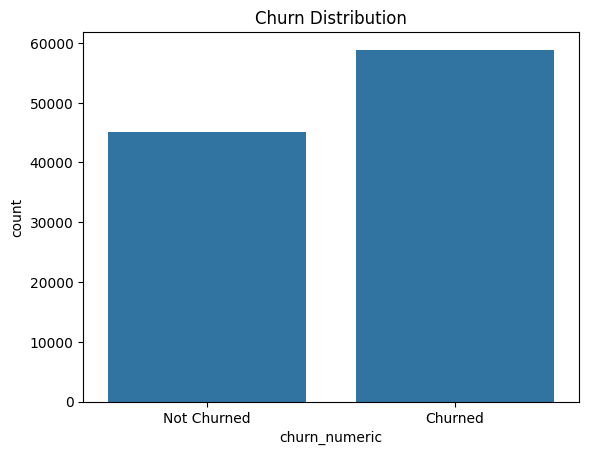

In [44]:
sns.countplot(data=customer_data_train, x='churn_numeric')
plt.title("Churn Distribution")
plt.xticks([0, 1], ["Not Churned", "Churned"])
plt.savefig('churn.jpg')
plt.show()

In [24]:
customer_data_train['arrivalDelay']=customer_data_train['arrivalDelay'].astype(int)

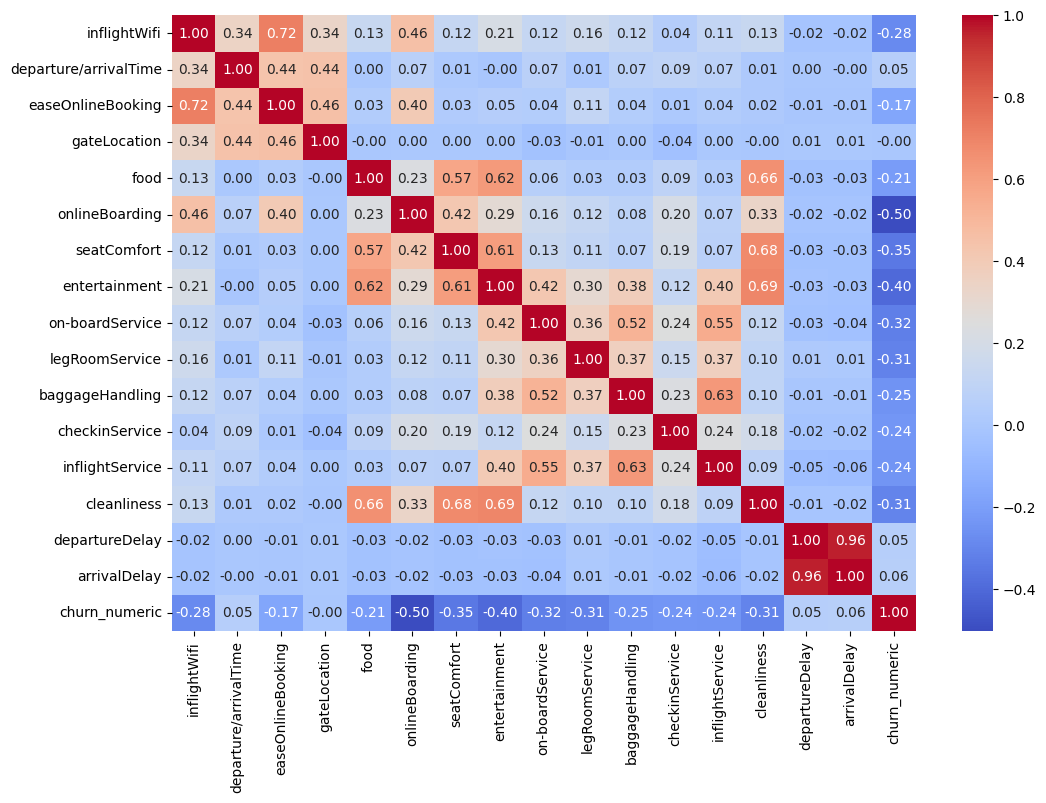

In [43]:
# Heatmap of service rating correlations
plt.figure(figsize=(12,8))
sns.heatmap(customer_data_train[['inflightWifi','departure/arrivalTime','easeOnlineBooking','gateLocation','food',
              'onlineBoarding','seatComfort','entertainment','on-boardService','legRoomService','baggageHandling',
              'checkinService','inflightService','cleanliness','departureDelay','arrivalDelay','churn_numeric']].corr(),
            annot=True,fmt='.2f',cmap='coolwarm')
plt.savefig("heat.jpg")


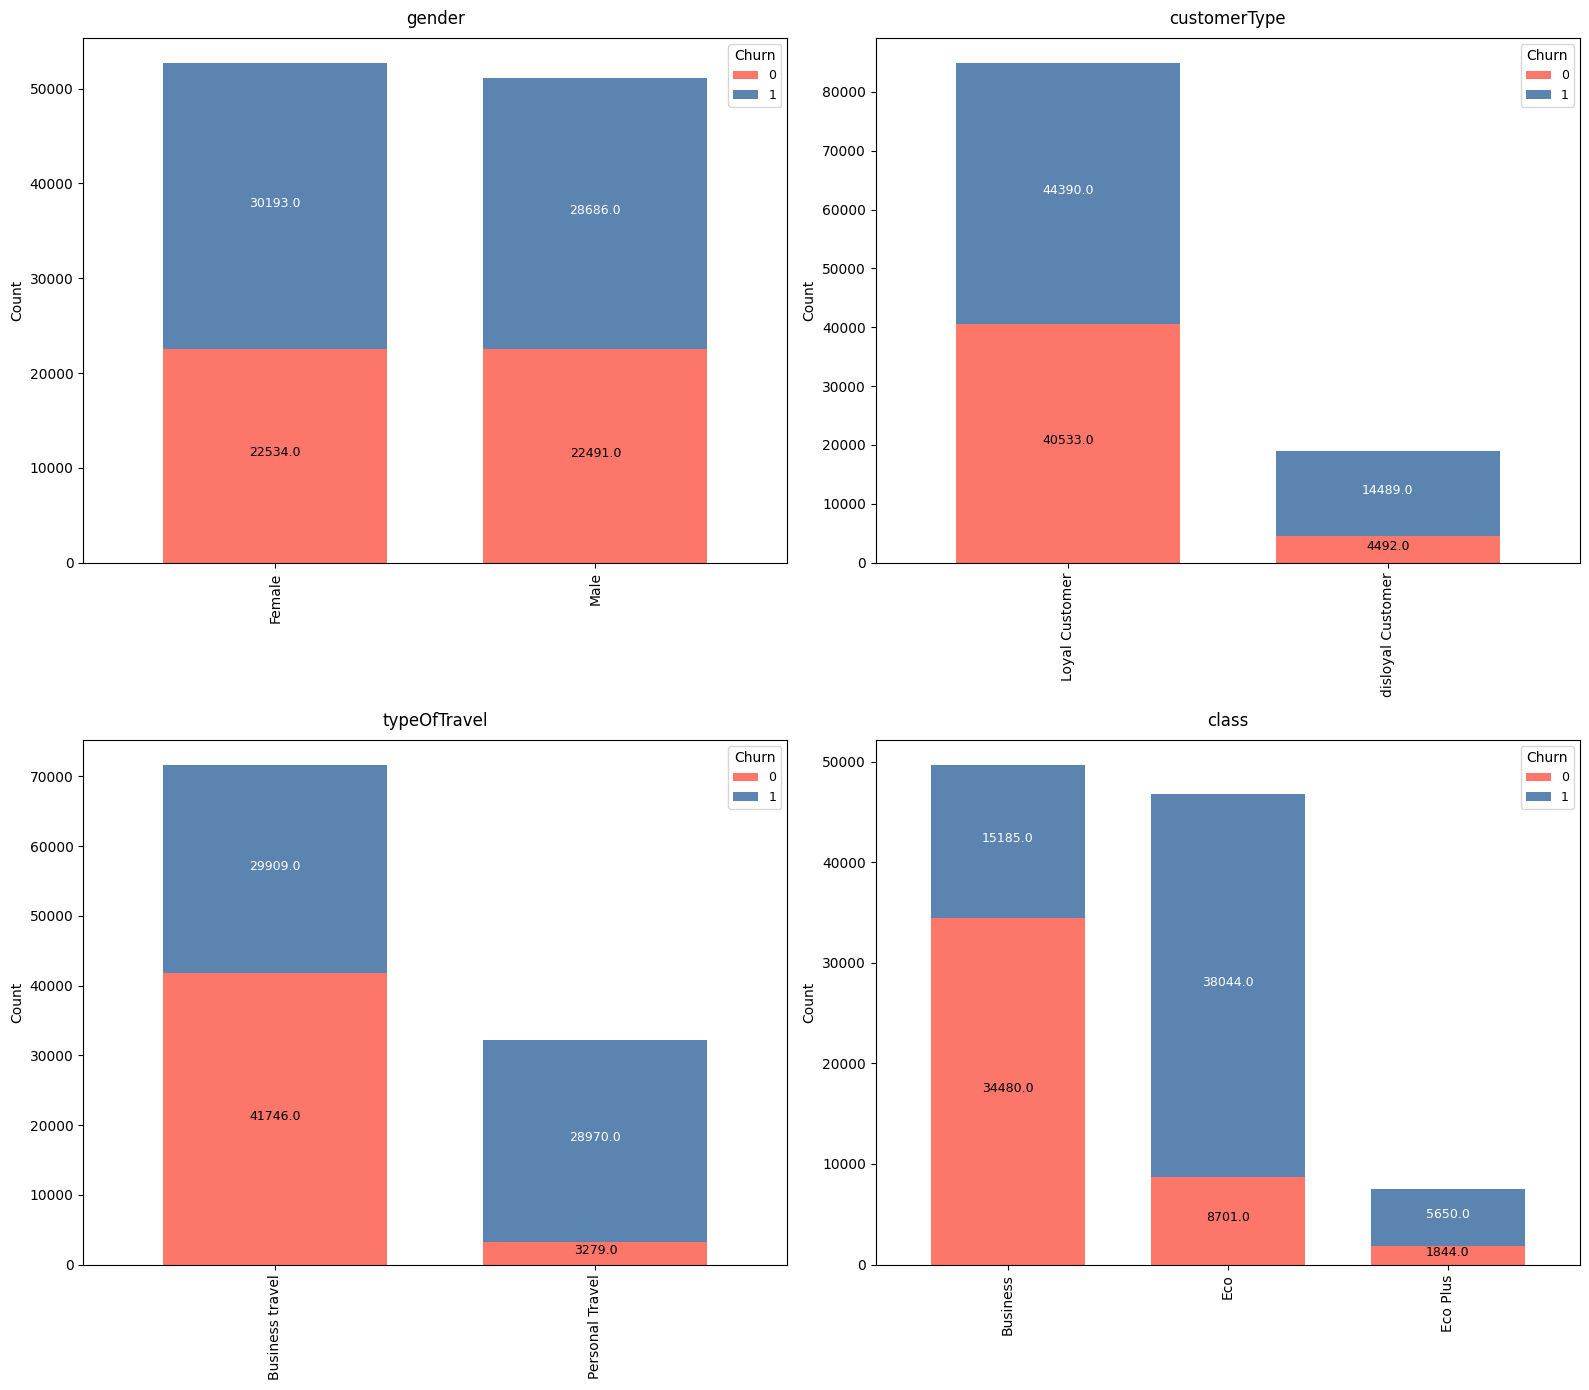

In [26]:
categorical_cols = ['gender', 'customerType', 'typeOfTravel', 'class']

# Setting up the plot grid
fig, axes = plt.subplots(2, 2, figsize=(16, 14))
axes = axes.flatten()

colors = ['#FC766AFF', '#5B84B1FF'] 

for i, col in enumerate(categorical_cols):
    ax = axes[i]
    
    # To creat crosstab
    count_customer_data_train = pd.crosstab(customer_data_train[col], customer_data_train['churn_numeric'])

    # Plot stacked bar chart
    bars = count_customer_data_train.plot(kind='bar', stacked=True, ax=ax, color=colors, width=0.7)
    ax.set_title(col, fontsize=12, pad=10)
    ax.set_ylabel("Count", fontsize=10)
    ax.set_xlabel("")

    # To add data labels
    for container in ax.containers:
        try:
            label = int(container.get_label())
        except ValueError:
            label = container.get_label()
        
        if label in count_customer_data_train.columns:
            total = count_customer_data_train.sum(axis=1)
            percent = count_customer_data_train[label] / total * 100
            labels = [f'{v}' if v > 0 else '' for v in container.datavalues]
            ax.bar_label(container, labels=labels,
                         label_type='center',
                         color='white' if label == 1 else 'black',
                         fontsize=9,
                         padding=2)

    ax.legend(title="Churn", bbox_to_anchor=(1, 1),
              title_fontsize=10, fontsize=9)

plt.tight_layout()
plt.show()


<Axes: xlabel='satisfaction', ylabel='flightDistance'>

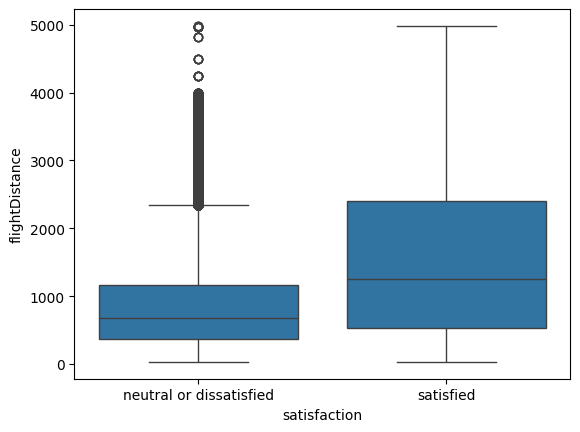

In [27]:
# Flight distance vs satisfaction
sns.boxplot(data=customer_data_train, x='satisfaction', y='flightDistance')

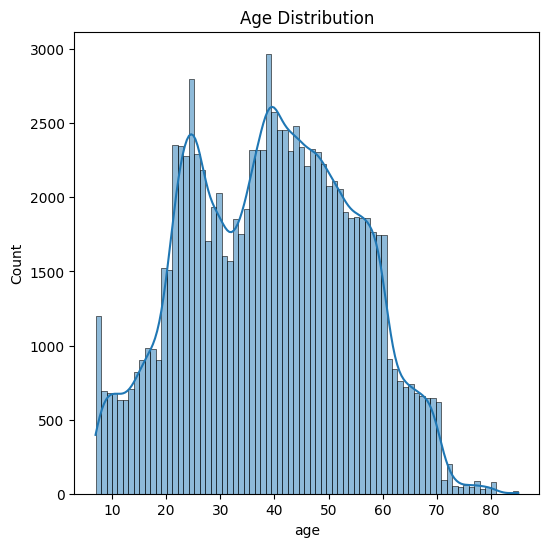

In [45]:
# Age distribution
plt.figure(figsize=(6,6))
sns.histplot(customer_data_train['age'],kde=True)
plt.title("Age Distribution")
plt.savefig('age.jpg')
plt.show()

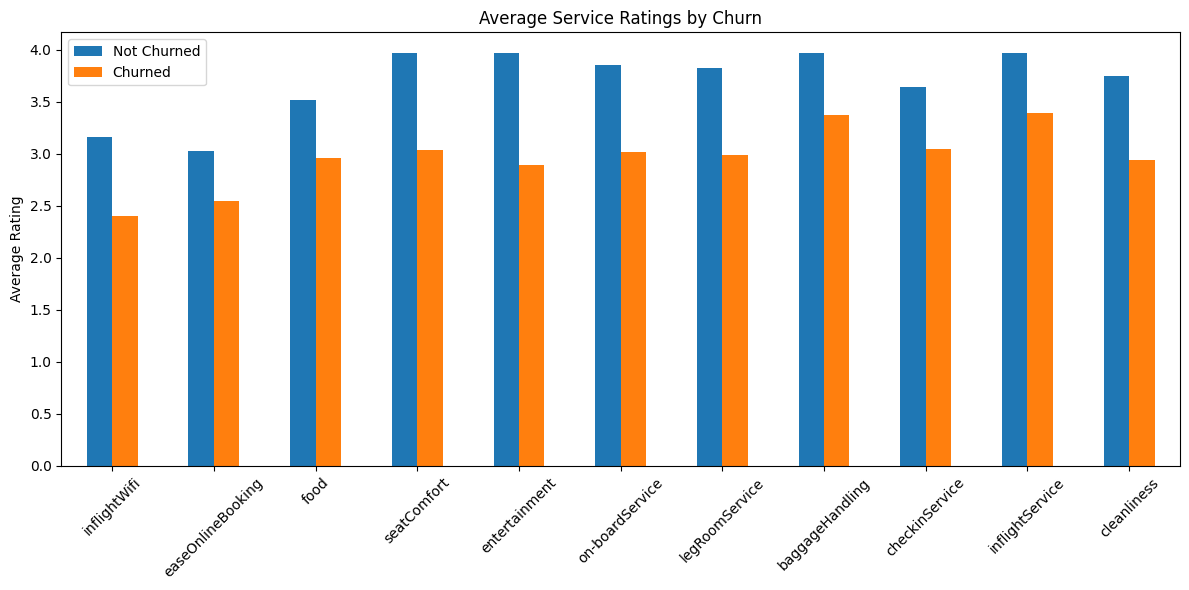

In [29]:
service_cols = ['inflightWifi', 'easeOnlineBooking', 'food', 'seatComfort', 'entertainment', 
                'on-boardService', 'legRoomService', 'baggageHandling', 
                'checkinService', 'inflightService', 'cleanliness']

avg_service = customer_data_train.groupby('churn_numeric')[service_cols].mean().T
avg_service.columns = ['Not Churned', 'Churned']
avg_service.plot(kind='bar', figsize=(12, 6), title='Average Service Ratings by Churn')
plt.ylabel("Average Rating")
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("rating.jpg")
plt.show()


## Data Preprocessing for Model

    Dependent Variable (churn_numeric):
    1 → Likely to Churn (At Risk)

    0 → Unlikely to Churn (Not at Risk)

    Independent Variables (Customer Service Experience Features):
    1. inflightWifi
    2. departure/arrivalTime
    3. easeOnlineBooking
    4. gateLocation
    5. food
    6. onlineBoarding
    7. seatComfort
    8. entertainment
    9. on-boardService
    10. legRoomService
    11. baggageHandling
    12. checkinService
    13. inflightService
    14. cleanliness

These features capture the customer’s satisfaction level across multiple touchpoints in their journey — from booking to in-flight experience.

In [30]:
customer_data_test['churn_numeric']=customer_data_test['satisfaction'].map({'neutral or dissatisfied':1,'satisfied':0})
customer_data_test.drop(columns='satisfaction')

,gender,customerType,age,typeOfTravel,class,flightDistance,inflightWifi,departure/arrivalTime,easeOnlineBooking,gateLocation,...,entertainment,on-boardService,legRoomService,baggageHandling,checkinService,inflightService,cleanliness,departureDelay,arrivalDelay,churn_numeric
0,Female,Loyal Customer,52,Business travel,Eco,160,5,4,3,4,...,5,5,5,5,2,5,5,50,44.0,0
1,Female,Loyal Customer,36,Business travel,Business,2863,1,1,3,1,...,4,4,4,4,3,4,5,0,0.0,0
2,Male,disloyal Customer,20,Business travel,Eco,192,2,0,2,4,...,2,4,1,3,2,2,2,0,0.0,1
3,Male,Loyal Customer,44,Business travel,Business,3377,0,0,0,2,...,1,1,1,1,3,1,4,0,6.0,0
4,Female,Loyal Customer,49,Business travel,Eco,1182,2,3,4,3,...,2,2,2,2,4,2,4,0,20.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25971,Male,disloyal Customer,34,Business travel,Business,526,3,3,3,1,...,4,3,2,4,4,5,4,0,0.0,1
25972,Male,Loyal Customer,23,Business travel,Business,646,4,4,4,4,...,4,4,5,5,5,5,4,0,0.0,0
25973,Female,Loyal Customer,17,Personal Travel,Eco,828,2,5,1,5,...,2,4,3,4,5,4,2,0,0.0,1
25974,Male,Loyal Customer,14,Business travel,Business,1127,3,3,3,3,...,4,3,2,5,4,5,4,0,0.0,0


In [31]:
# service-related feature 
service_features = [
    'inflightWifi', 'departure/arrivalTime', 'easeOnlineBooking', 'gateLocation',
    'food', 'onlineBoarding', 'seatComfort', 'entertainment',
    'on-boardService', 'legRoomService', 'baggageHandling', 'checkinService',
    'inflightService', 'cleanliness']

target = 'churn_numeric'

In [32]:

X_train = customer_data_train[service_features]
y_train = customer_data_train['churn_numeric']

X_test = customer_data_test[service_features]
y_test = customer_data_test['churn_numeric']



In [33]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [34]:
lr_model = LogisticRegression(random_state=42)
lr_model.fit(X_train_scaled, y_train)

y_pred_lr = lr_model.predict(X_test_scaled)


In [35]:
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_lr))
print("Classification Report:\n", classification_report(y_test, y_pred_lr))


Logistic Regression Accuracy: 0.8137511549122267
Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.77      0.78     11403
           1       0.82      0.85      0.84     14573

    accuracy                           0.81     25976
   macro avg       0.81      0.81      0.81     25976
weighted avg       0.81      0.81      0.81     25976



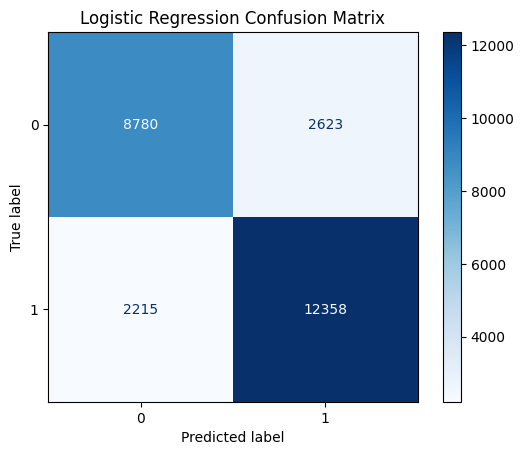

In [48]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_lr, cmap='Blues')
plt.title("Logistic Regression Confusion Matrix")
plt.savefig("lr_m.jpg")
plt.show()

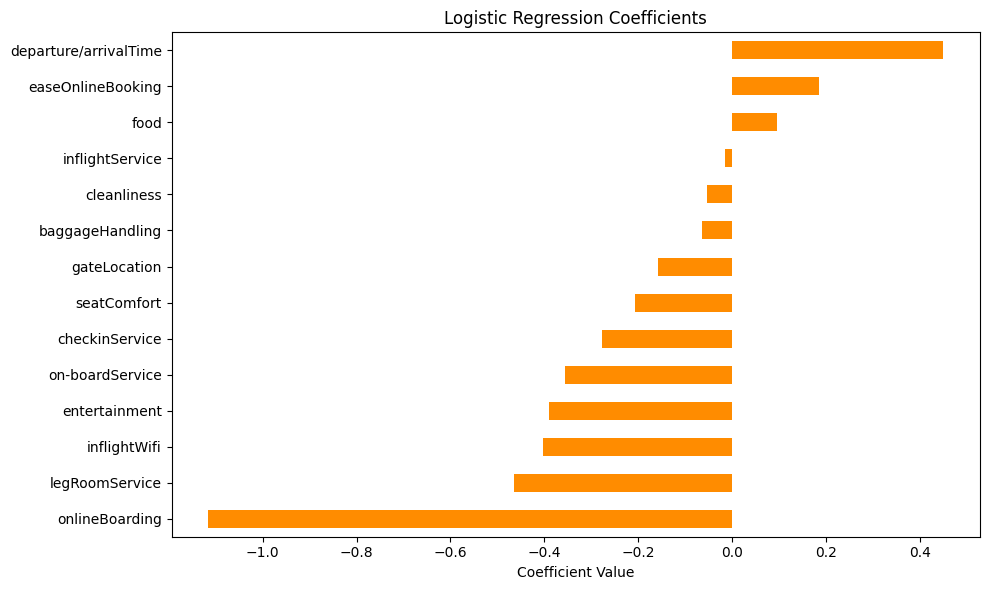

In [37]:
# lr coeffiecients
coefficients = pd.Series(lr_model.coef_[0], index=service_features)
coefficients.sort_values().plot(kind='barh', figsize=(10, 6), color='darkorange')
plt.title("Logistic Regression Coefficients")
plt.xlabel("Coefficient Value")
plt.savefig("lr.jpg")
plt.tight_layout()
plt.show()


In [38]:

X_train = customer_data_train[service_features]
y_train = customer_data_train[target]

X_test = customer_data_test[service_features]
y_test = customer_data_test[target] if target in customer_data_test.columns else None


In [39]:

model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)


In [40]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.9457191253464736
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.93      0.94     11403
           1       0.94      0.96      0.95     14573

    accuracy                           0.95     25976
   macro avg       0.95      0.94      0.94     25976
weighted avg       0.95      0.95      0.95     25976



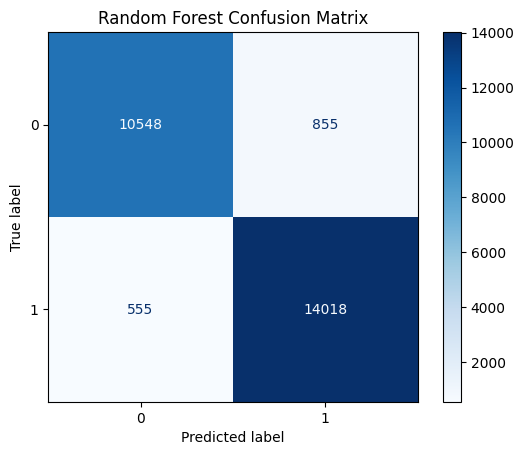

In [49]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, cmap='Blues')
plt.title("Random Forest Confusion Matrix")
plt.savefig('rf_m.jpg')
plt.show()

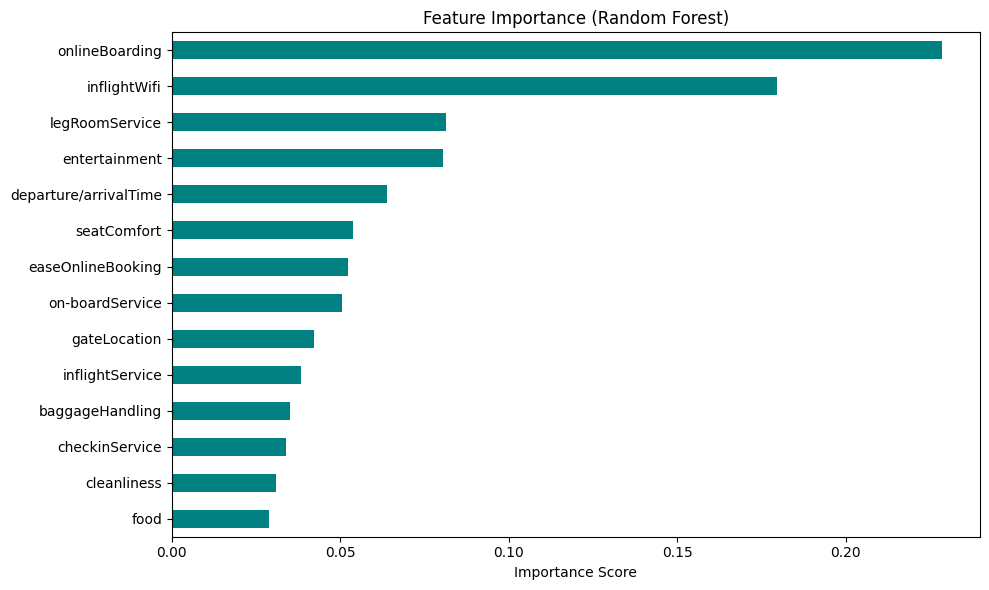

In [42]:
# feature importance
importances = pd.Series(model.feature_importances_, index=service_features)

# sort and plot
importances.sort_values(ascending=True).plot(kind='barh', figsize=(10, 6), color='teal')
plt.title("Feature Importance (Random Forest)")
plt.xlabel("Importance Score")
plt.tight_layout()
plt.savefig("rf.jpg")
plt.show()